# Taller 3 -Manejo de Archivos y BioPython
## Andres Felipe Sanchez Aguirre
## 2019-1, Prof. Javier Correa

1. Un investigador desea desarrollar un Script en python, que le permita encontrar el grupo monifilético en común entre una lista de especies de plantas (archivo adjunto: lista_mercado.tsv). La información sobre la taxonomía de cada una de las especies fue descargada de la base de datos del GenBank, luego concatenada y se encuentra en formato .gb anexo <br> 

#### $\rightarrow$ Con el archivo "Mercado.gb";<br>
- A. Desarrolle un script con el cual pueda extrer la información relacionada con la taxonomía de cada especie.<br>
- B. Organice esta información en una objeto tipo lista o diccionario.<br>
- C. Cree una función que reciba el objeto anterior y compare las clasificaciones entre las diferentes especies para retornar el ancestro monofilético común más reciente a todas ellas. <br> Ejemplo: Embryophyta

# A #

In [5]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
handle = SeqIO.parse("Mercado.gb", "genbank")
reads = []
for read in handle:
    reads.append(read)
for i in range(0,len(reads)):
    print(reads[i].id, reads[i].annotations["organism"] ,reads[i].annotations["taxonomy"])
    
reads[1].annotations

MG859922.1 Pisum sativum subsp. elatius ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Fabales', 'Fabaceae', 'Papilionoideae', 'Fabeae', 'Pisum']
MH283711.1 Solanum melongena var. insanum ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'asterids', 'lamiids', 'Solanales', 'Solanaceae', 'Solanoideae', 'Solaneae', 'Solanum']
KX028884.1 Cocos nucifera ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'Liliopsida', 'Arecaceae', 'Arecoideae', 'Cocoseae', 'Attaleinae', 'Cocos']
HQ336405.1 Prunus persica ['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Gunneridae', 'Pentapetalae', 'rosids', 'fabids', 'Rosales',

{'molecule_type': 'DNA',
 'topology': 'circular',
 'data_file_division': 'PLN',
 'date': '01-SEP-2018',
 'accessions': ['MH283711'],
 'sequence_version': 1,
 'keywords': [''],
 'source': 'chloroplast Solanum melongena var. insanum',
 'organism': 'Solanum melongena var. insanum',
 'taxonomy': ['Eukaryota',
  'Viridiplantae',
  'Streptophyta',
  'Embryophyta',
  'Tracheophyta',
  'Spermatophyta',
  'Magnoliophyta',
  'eudicotyledons',
  'Gunneridae',
  'Pentapetalae',
  'asterids',
  'lamiids',
  'Solanales',
  'Solanaceae',
  'Solanoideae',
  'Solaneae',
  'Solanum'],
 'references': [Reference(title='Shedding new light on the origin and spread of the brinjal eggplant (Solanum melongena L.) and its wild relatives', ...),
  Reference(title='Direct Submission', ...)]}

# B #

In [6]:
taxon=[]
ids=[]
for i in range(0,len(reads)):
    aux = reads[i].annotations["taxonomy"]
    taxon.append(aux)
for i in range(0,len(reads)):
    aux = reads[i].id
    ids.append(aux)
print(ids[0],taxon[0][0])

MG859922.1 Eukaryota


# C #

In [7]:
Ancestro=0
longar=len(taxon)
for i in range(0,longar):
    for j in range(0,len(taxon[i])):
        try: 
            if taxon[i][j]==taxon[i+1][j]:
                Ancestro=j
            else:
                for x in range(0,len(taxon[i])):
                    if taxon[x][Ancestro]!= taxon[x+1][Ancestro]:
                        for k in range(0,len(taxon[i])):
                            if taxon[x][k]==taxon[x+1][k]:
                                Ancestro=k
                    else: 
                        continue
        except:
            continue

print(taxon[0][Ancestro])

Magnoliophyta


In [8]:
## otra forma pero no siempre da, ya que no tiene en cuenta los taxones que estan mas adelante del contador
ance=0
for i in range(0,len(taxon)):
    for j in range(0,len(taxon[i])):
        try: 
            if taxon[i][j]==taxon[i+1][j]:
                ance=j
            else:
                continue
        except:
            continue
print(taxon[0][ance])

Pentapetalae


2 . El mismo investigador está ahora interesado en hacer una caracterización funcional de los genomas de los cloroplastos que poseen estas especies. Para esto y continuando con el archivo del punto anterior (Mercado.gb), resuelva las siguientes preguntas:

- A. Una forma de diferenciar una especie de otra es a través de la estimación del contenido de Guaninas y Citosinas en los genomas. Utilizando funciones de biopython responder; ¿Cuales son los valores de %GC para cada especie? retorne un diccionario con las especies como llave y su respectivo valor de %GC. Consulte el diccionario y muestre ¿Qué especie presenta el mayor %GC? ¿Y cual el más bajo? Represente los resultados en un dendograma donde se relacione las proximidades en los contenidos de %GC (puede usar Ploty, numpy, etc).

- B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?



# 2.A #

In [9]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
handle = SeqIO.parse("Mercado.gb", "genbank")
reads = []
secuencias=[]
ids=[]
for read in handle:
    reads.append(read)
for i in reads:
    secuencias.append(i.seq)
suma = (secuencias[1].count("G") +secuencias[1].count("C"))/len(secuencias[1])
## ids de cada specie
for i in range(0,len(reads)):
    aux = reads[i].id
    ids.append(aux)

In [10]:
dic={}
for i in range(0,len(secuencias)):
    dic[ids[i]]= (secuencias[i].count("G") +secuencias[i].count("C"))/len(secuencias[i])
dic 

{'MG859922.1': 0.3483117563298908,
 'MH283711.1': 0.3771035546699235,
 'KX028884.1': 0.374382835724441,
 'HQ336405.1': 0.3675961721275112,
 'EU835853.1': 0.33906271195908044,
 'DQ383816.1': 0.37549420050794646,
 'NC_027152.1': 0.3442549627135736,
 'MG255765.1': 0.37812247411569994,
 'DQ231562.1': 0.3787344184609045,
 'KR336549.1': 0.3737314891377885,
 'MF805727.1': 0.3724374706454366,
 'KR233156.1': 0.3636138387908663,
 'KP117024.1': 0.3786184803026014,
 'EU117376.1': 0.3587297851387091}

In [8]:
mayor=""
num=0
for i in range(0,len(ids)):
    if dic[ids[i]] > num:
        num=dic[ids[i]]
        mayor=ids[i]
print(mayor)

DQ231562.1


In [19]:
menor=""
num1=1
for i in range(0,len(ids)-1):
    if dic[ids[i]] < num1:
        num1=dic[ids[i]]
        menor=ids[i]
print(menor)

EU835853.1


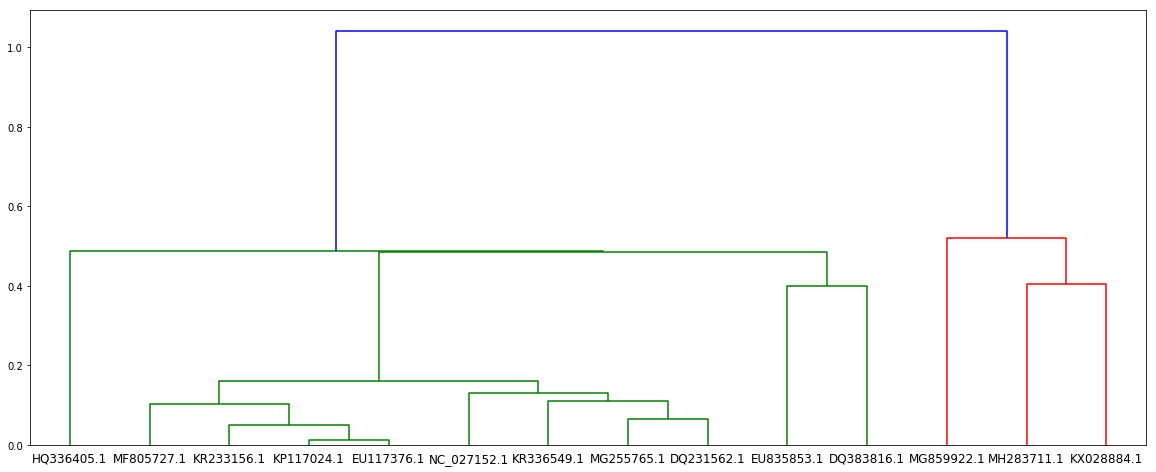

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
X = np.array([[33.90627119590804],[34.42549627135735], [34.8311756329890],[35.87297851387091], [36.36138387908663],[36.759617212751124],
    [37.243747064543655],[37.37314891377885],[37.4382835724441], [37.54942005079465], [37.71035546699235],[37.81224741156999]
    ,[37.86184803026014],[37.87344184609045],])
linked = linkage(X, 'single')
labelList = ids
plt.figure(figsize=(20, 8))  
dendrogram(linked, orientation='top',labels=ids,distance_sort='ascending', show_leaf_counts=False)
plt.show()

# 2.B #

B. Otra forma de caracterizar los genomas es estimando la frecuencia con las que aparecen los codones en los genes codificantes. Usando biopython hacer una función que me extraiga los genes codificantes para cada genoma del cloroplasto del archivo .gb, definir una función que me permita estimar la frecuencia de cada uno de los codones usados por la célula. Con las herramientas anteriores y usando funciones accesorias grafique la frecuencia de estos codones versus el codón encontrado para cada una de las especies. Finalmente, responda: ¿Qué especie presenta el codón más inusual? ¿Qué aminoácido es el mas prevalente y menos prevalente?

In [13]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
handle = SeqIO.parse("Mercado.gb", "genbank")
reads = []
fec=[]
for read in handle:
    reads.append(read)
reads[0].features
for ft in range(0,len(reads)):
    f=reads[ft].seq
    fec.append(f)

In [14]:
fec
##reads[0].features

[Seq('GGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCTTG...GCG', IUPACAmbiguousDNA()),
 Seq('AAAAAATTGATAAGCTTAACACAAAAGTTATGGGCGAACGACGGGAATTGAACC...TAA', IUPACAmbiguousDNA()),
 Seq('AAATTTTCCTTTCCATTATGAATAGCGATTGTATGGCCAATCATTGTGGGTATA...TAC', IUPACAmbiguousDNA()),
 Seq('TGGGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCT...TTA', IUPACAmbiguousDNA()),
 Seq('TGGGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCT...TTA', IUPACAmbiguousDNA()),
 Seq('TAAATTCAATTTGGGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACA...AAT', IUPACAmbiguousDNA()),
 Seq('ATCCACTTGGCTACATCCGCCCTATAACTATGTCTAAATTATACAACTTTTTAT...TTG', IUPACAmbiguousDNA()),
 Seq('TGATGATATCATTTTAGTTATGGGCGAACGACGGGAATTGAACCCGCGCATGGT...GGA', IUPACAmbiguousDNA()),
 Seq('CTGTCTAATATCTCATATTTATGAATTATGGGCGAACGACGGGAATTGAACCCG...AAC', IUPACAmbiguousDNA()),
 Seq('AAAAAATACCCAATATCTTGTTTAGCAAGATATTGGGTATTTTTCCTTCAGCAA...AAG', IUPACAmbiguousDNA()),
 Seq('GCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCTTGA...CGG', IUPACAmbiguousDNA()),

In [15]:
Codones={'ATG':'M','ACA':'T', 'ACC':'T', 'ACG':'T',
         'ACT':'T','ATA':'I', 'ATC':'I', 'ATT':'I', 
         'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
         'AGC':'S', 'AGT':'S', 'CAA':'Q', 'CAG':'Q',
         'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
         'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
         'CAC':'H', 'CAT':'H', 'AGA':'R', 'AGG':'R',
         'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
         'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
         'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
         'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
         'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
         'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
         'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
         'TAC':'Y', 'TAT':'Y', 'TGC':'C', 'TGT':'C', 
         'TGA':'.', 'TGG':'W','TAA':'.', 'TAG':'.',}

In [16]:
frec1={}
for con in Codones:
        frec1[con]=Codones[con]
        suma =fec[0].count(con) 
        frec1[con]=(suma/len(fec[0]))

In [17]:
def frecuencias_codones(fec,i,Codones):
    frec={}
    for con in Codones:
        frec[con,Codones[con]]=Codones[con]
        suma =fec[i].count(con) 
        frec[con]=(suma/len(fec[i]))
    return frec
frecuencias_codones(fec,3,Codones)

for i in range(0,len(fec)):
    print("specie #"+ str(i) + str(frecuencias_codones(fec,i,Codones))+'/n') 

specie #0{('ATG', 'M'): 'M', 'ATG': 0.01722614118070672, ('ACA', 'T'): 'T', 'ACA': 0.01272524918574772, ('ACC', 'T'): 'T', 'ACC': 0.010319317828442365, ('ACG', 'T'): 'T', 'ACG': 0.006587669192621811, ('ACT', 'T'): 'T', 'ACT': 0.013690895104666197, ('ATA', 'I'): 'I', 'ATA': 0.029304898607178515, ('ATC', 'I'): 'I', 'ATC': 0.020180363017397993, ('ATT', 'I'): 'I', 'ATT': 0.03826576539714234, ('AAC', 'N'): 'N', 'AAC': 0.014803842943419696, ('AAT', 'N'): 'N', 'AAT': 0.03832304947707819, ('AAA', 'K'): 'K', 'AAA': 0.02836380300823254, ('AAG', 'K'): 'K', 'AAG': 0.01754529534034927, ('AGC', 'S'): 'S', 'AGC': 0.008608978870357943, ('AGT', 'S'): 'S', 'AGT': 0.012848000785610238, ('CAA', 'Q'): 'Q', 'CAA': 0.021015073896463118, ('CAG', 'Q'): 'Q', 'CAG': 0.008437126630550419, ('GTA', 'V'): 'V', 'GTA': 0.01328172310512447, ('GTC', 'V'): 'V', 'GTC': 0.007692433591384475, ('GTG', 'V'): 'V', 'GTG': 0.006260331592988428, ('GTT', 'V'): 'V', 'GTT': 0.015540352542594804, ('CCA', 'P'): 'P', 'CCA': 0.013658161

specie #5{('ATG', 'M'): 'M', 'ATG': 0.017607938627497186, ('ACA', 'T'): 'T', 'ACA': 0.012436833974812139, ('ACC', 'T'): 'T', 'ACC': 0.010689131516246432, ('ACG', 'T'): 'T', 'ACG': 0.007062812557274894, ('ACT', 'T'): 'T', 'ACT': 0.013137224098656822, ('ATA', 'I'): 'I', 'ATA': 0.02546278113790485, ('ATC', 'I'): 'I', 'ATC': 0.02053386746262404, ('ATT', 'I'): 'I', 'ATT': 0.03450894142905768, ('AAC', 'N'): 'N', 'AAC': 0.015048569109522687, ('AAT', 'N'): 'N', 'AAT': 0.03382164270939701, ('AAA', 'K'): 'K', 'AAA': 0.026222082580577594, ('AAG', 'K'): 'K', 'AAG': 0.019997119891079516, ('AGC', 'S'): 'S', 'AGC': 0.009393082502029167, ('AGT', 'S'): 'S', 'AGT': 0.013359777969785038, ('CAA', 'Q'): 'Q', 'CAA': 0.020317859293587832, ('CAG', 'Q'): 'Q', 'CAG': 0.00917052863090095, ('GTA', 'V'): 'V', 'GTA': 0.013287775246772968, ('GTC', 'V'): 'V', 'GTC': 0.008502867017516298, ('GTG', 'V'): 'V', 'GTG': 0.007671562851831487, ('GTT', 'V'): 'V', 'GTT': 0.015192574555546828, ('CCA', 'P'): 'P', 'CCA': 0.0135823

specie #11{('ATG', 'M'): 'M', 'ATG': 0.015896613330203566, ('ACA', 'T'): 'T', 'ACA': 0.012049606822894254, ('ACC', 'T'): 'T', 'ACC': 0.010967228720837734, ('ACG', 'T'): 'T', 'ACG': 0.007015896613330203, ('ACT', 'T'): 'T', 'ACT': 0.013275432625223321, ('ATA', 'I'): 'I', 'ATA': 0.026792118200905025, ('ATC', 'I'): 'I', 'ATC': 0.019913148937834982, ('ATT', 'I'): 'I', 'ATT': 0.03474042486600681, ('AAC', 'N'): 'N', 'AAC': 0.015257619028989476, ('AAT', 'N'): 'N', 'AAT': 0.035040360966576686, ('AAA', 'K'): 'K', 'AAA': 0.028298319053766806, ('AAG', 'K'): 'K', 'AAG': 0.019371959886806723, ('AGC', 'S'): 'S', 'AGC': 0.009395824367852067, ('AGT', 'S'): 'S', 'AGT': 0.013542766975731257, ('CAA', 'Q'): 'Q', 'CAA': 0.019671895987376602, ('CAG', 'Q'): 'Q', 'CAG': 0.008652504466439758, ('GTA', 'V'): 'V', 'GTA': 0.013458002425570204, ('GTC', 'V'): 'V', 'GTC': 0.007935265965077005, ('GTG', 'V'): 'V', 'GTG': 0.007341914113949637, ('GTT', 'V'): 'V', 'GTT': 0.015844450530104456, ('CCA', 'P'): 'P', 'CCA': 0.01

In [91]:
frec1=[]
file = open('datos1.csv','w') 
for con in Codones: 
    suma =fec[0].count(con) 
    file.write(str(con)+","+str(suma/len(fec[0]))+ '\n') 
file.close()    

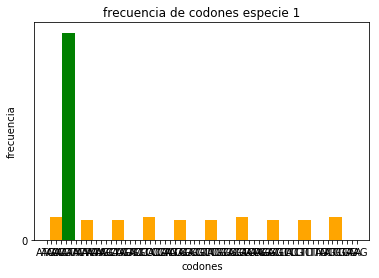

In [99]:
#file = open('datos1.csv', 'r') 
#file.read()
file = pd.read_csv('datos1.csv')
Codon = file['cod']
fresc = file['fer']
plt.hist([Codon, fresc], color=['orange', 'green'])
plt.xlabel("codones")
plt.ylabel("frecuencia")
plt.xticks(range(0, len(file)))
plt.yticks(range(0, 1))
plt.title('frecuencia de codones especie 1')
plt.show()

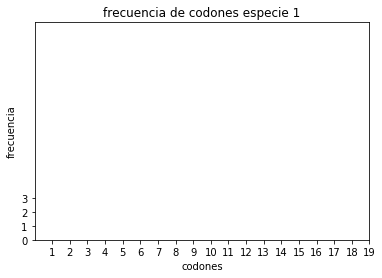

In [105]:
file = pd.read_csv('datos1.csv')
fresc=file['fer']
plt.hist( fresc )
color= ['green']
plt.xlabel("codones")
plt.ylabel("frecuencia")
plt.xticks(range(1,20))
plt.yticks(range(0, 4))
plt.title('frecuencia de codones especie 1')
plt.show()